<img src="banner.jpg" style="width:100%;">

**Presentado por:**<br/>
Andrea Fabiana Villamizar Ruiz<br/>
Anngy Nathalia Gómez Avila<br/>
Maria Fernanda Vera Negrón<br/>

In [0]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
%matplotlib inline


<h1>Tratamiento de los datos</h1>

In [0]:

d = pd.read_csv("breast-cancer.csv") #lectura dataset virtual box

In [0]:
d.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
diagnosis = {'M':0, 'B':1}#reemplazamos los valores que no son numericos
d.diagnosis.replace(diagnosis, inplace=True)

In [0]:
d.isnull().sum()#miramos si hay valores nulos

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [0]:
del d['id'] #eliminamos las columnas que no aportan nada
del d['Unnamed: 32']


In [0]:
d.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<H2>PCA</H2>

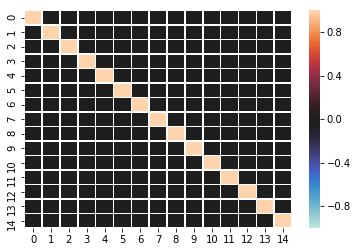

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
v = d.values[:,1:31]#extrae las columnas excepto la de diagnosis que es la primera pues esta tiene valores discretos y no lo necesitamos normalizar
s1= StandardScaler()
v1 = s1.fit_transform(v)
p=PCA(n_components=15)
p.fit(v1)
X2=p.transform(v1)
c=pd.DataFrame(X2)
sns.heatmap(c.corr(),center=0, vmin=-1, vmax=1,linewidths=.5)


In [0]:
d.corr() #creamo la matriz de correlaciones para observar que parametros estan linealmente correlacionados, sacamos los que tinen un coeficinete mayor a 90

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,-0.330499,...,-0.776454,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.659610,-0.793566,-0.416294,-0.323872
radius_mean,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


Observando la matriz de correlaciones podemos ver que hay varias caracteristicas relacionadas entre si.<br/>
- area_mean esta relacionada con perimeter_mean (ρ = 0.98651).
- area_se esta relacionada con perimeter_se (ρ = 0.93766).
- area_worst esta relacionada con perimeter_worst (ρ = 0.97758).
- perimeter_mean esta relacionada con radius_mean (ρ = 0.99786).
- perimeter_se esta relacionada con radius_se (ρ = 0.97279).
- perimeter_worst esta relacionada con radius_worst (ρ = 0.99371).
- radius_worst esta relacionada con area_mean (ρ = 0.96275).
- concave points_mean esta relacionada con concavity_mean (ρ = 0.92139).
- concave points_worst esta relacionada con concave points_mean (ρ = 0.91016).
- texture_worst esta relacionada con texture_mean (ρ = 0.91204).

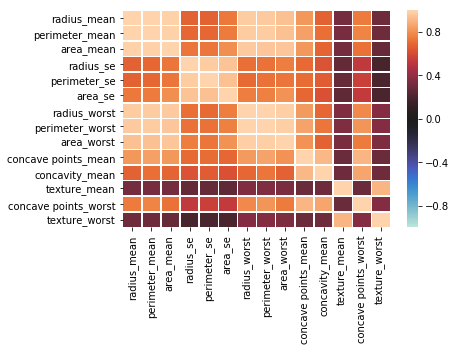

In [0]:
s = d.loc[:, ["radius_mean", "perimeter_mean","area_mean","radius_se","perimeter_se", "area_se",
"radius_worst","perimeter_worst", "area_worst", "concave points_mean", "concavity_mean","texture_mean",
"concave points_worst", "texture_worst"]].copy()
sns.heatmap(s.corr(),center=0, vmin=-1, vmax=1,linewidths=.5)

Se pueden apreciar las siguientes correlaciones:<br/>
- <i>radius_mean</i>, <i>perimeter_mean</i>, y <i>area_mean</i>, elegimos <i>radius_mean</i>.
- <i>radius_se</i>, <i>perimeter_se</i>, y <i>area_se</i>, elegimos <i>radius_se</i>.
- <i>radius_worst</i>, <i>perimeter_worst</i>, y <i>area_worst</i>, elegimos <i>radius_worst</i>.
- <i>radius_worst</i> y <i>radius_mean</i>, elegimos <i>radius_mean</i>.
- <i>concave points_mean</i>, <i>concavity_mean</i>, y <i>concave points_worst</i>, elegimos <i>concave points_mean</i>
- <i>texture_mean</i>, y <i>texture_worse</i>, elegimos <i>texture_mean</i>.

<br/>De las 14 variables anteriores conservamos solo 4 que son las siguientes:<br/>
- radius_mean.
- radius_se.
- concave points_mean.
- texture_mean.



In [0]:
d=d.drop(["perimeter_mean","area_mean","perimeter_se", "area_se", "radius_worst","perimeter_worst", "area_worst", "concavity_mean", "concave points_worst", "texture_worst"],1)


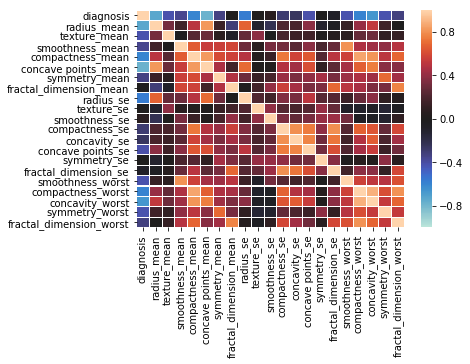

In [0]:
sns.heatmap(d.corr(),center=0, vmin=-1, vmax=1,linewidths=.1)

In [0]:
df = d.values[:,1:22]#extrae las columnas excepto la de diagnosis que es la primera pues esta tiene valores discretos y no lo necesitamos normalizar
s = StandardScaler()
X = pd.DataFrame(s.fit_transform(df))
X.columns = ['radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [0]:

y = d["diagnosis"].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)
X_train2, X_test2, y_train, y_test = train_test_split(X2, y, test_size = 0.2, random_state=123)

<h1>Entrenamiento</h1>


<h2> Matriz de confusión</h2>
<img src="predi.png" style="width:700px;">

<h2> Evaluación</h2>

In [0]:
def evaluar(model, test_x, test_y):
    predictions = model.predict(test_x)
    F1 = np.mean(f1_score(test_y, predictions))
    g= accuracy_score(predictions, test_y)
    return F1, g 

In [0]:
from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
def evaluarcross (model,  X, y):
    means, stds = [], []
    nfolds_range = range(2,11)
    for nfolds in nfolds_range:
        print nfolds,
        s = cross_val_score(model, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="red")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="yellow", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()


In [0]:
from sklearn.model_selection import LeaveOneOut

def newcrossval(model, x, y):
    t=cross_val_score(model, x, y, cv=LeaveOneOut(), scoring=make_scorer(accuracy_score))
    c=np.mean(t)
    return c


<h2>Regresión Logistica</h2>

Matriz de confusión
[[40  1]
 [ 0 73]]
tn:  40  fp:  1  fn:  0  tp:  73
Precisión
F1 score = 0.9932
Accuracy Score= 0.9912
Cross validation score 1: 0.9771
Cross validation score 2:0.9754
2 3 4 5 6 7 8 9 10


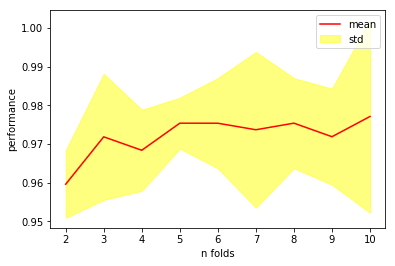

In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0, max_iter=30)

model.fit(X_train,y_train)
pred1=model.predict(X_test)
print("Matriz de confusión")
print confusion_matrix(y_test, pred1)
tn, fp, fn, tp = confusion_matrix(y_test, pred1).ravel()

print "tn: ",tn," fp: ", fp," fn: ", fn," tp: ", tp
f1r=evaluar(model,X_test,y_test)[0] #f1_score
a1r=evaluar(model,X_test,y_test)[1] #accuracy_score
crossr2=newcrossval(model, X, y)
crossr1=cross_val_score(model, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
crossr1=np.mean(crossr1)
print('Precisión')
print('F1 score = %.4f' % f1r)
print('Accuracy Score= %.4f' % a1r)

print "Cross validation score 1: %.4f" %crossr1
print "Cross validation score 2:%.4f"%crossr2
evaluarcross(model,X,y)

                CROSS1 VS CROSS2   
         0.9771                0.9754


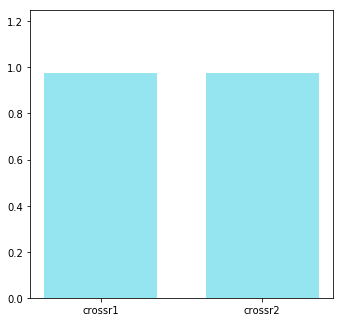

In [0]:

cross = [crossr1,crossr2] 
values = ('crossr1','crossr2') 
plt.axes((0.1, 0.1,0.7,1))  
plt.bar(np.arange(2), cross,color="#95E5F1",width=0.7)  
plt.ylim(0,1.25) 
plt.xticks(np.arange(2), values)  
print '                CROSS1 VS CROSS2   '
print '         %.4f'%crossr1,'               %.4f'%crossr2

Comparando las distintas variaciones de cross_val_score obteniendo como 
resultado que para  el modelo de **LogisticRegression** obtuvimos un mejor valor 
de veracidad en la implementación del cross_val_score con **KFold**




[[38  3]
 [ 1 72]]
tn:  38  fp:  3  fn:  1  tp:  72
Cross validation score: 0.9526
2 3 4 5 6 7 8 9 10


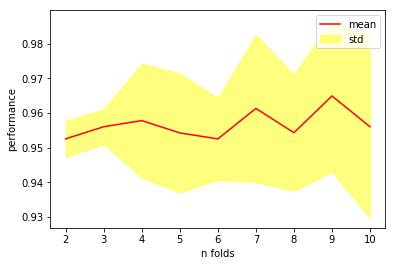

In [0]:
model0 = LogisticRegression(random_state=0, max_iter=30, solver = 'lbfgs')

model0.fit(X_train2,y_train)
pred0=model0.predict(X_test2)
print confusion_matrix(y_test, pred0)
tn, fp, fn, tp = confusion_matrix(y_test, pred0).ravel()
print "tn: ",tn," fp: ", fp," fn: ", fn," tp: ", tp
RL=evaluar(model0,X_test2,y_test)[0]
newcrossval(model0, X2, y)
crossl1=cross_val_score(model0, X2, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "Cross validation score: %.4f" %np.mean(crossl1)
evaluarcross(model0,X2,y)

<h2>Random Forest</h2>

Matriz de confusión
[[39  2]
 [ 1 72]]
tn:  39  fp:  2  fn:  1  tp:  72
Precisión
F1 score = 0.9796
Accuracy Score= 0.9737
Cross validation score 1: 0.9455
Cross validation score 2:0.9508
2 3 4 5 6 7 8 9 10


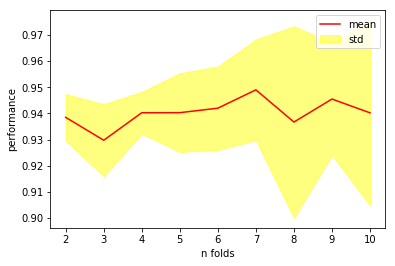

In [0]:
model2 = RandomForestClassifier(random_state=0)
model2.fit(X_train, y_train)
pred2=model2.predict(X_test)
print("Matriz de confusión")
print confusion_matrix(y_test, pred2)
tn, fp, fn, tp = confusion_matrix(y_test, pred2).ravel()
print "tn: ",tn," fp: ", fp," fn: ", fn," tp: ", tp
f1f=evaluar(model2,X_test,y_test)[0] #f1_score
a1f=evaluar(model2,X_test,y_test)[1] #accuracy_score
crossf2=newcrossval(model2, X, y)
crossf1=cross_val_score(model2, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
crossf1=np.mean(crossf1)
print('Precisión')
print('F1 score = %.4f' % f1f)
print('Accuracy Score= %.4f' % a1f)
print "Cross validation score 1: %.4f" %crossf1
print "Cross validation score 2:%.4f"%crossf2
evaluarcross(model2,X,y)


                CROSS1 VS CROSS2   
         0.9455                0.9508


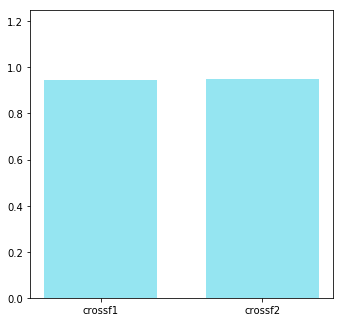

In [0]:
cross = [crossf1,crossf2] 
values = ('crossf1','crossf2') 
plt.axes((0.1, 0.1,0.7,1))  
plt.bar(np.arange(2), cross,color="#95E5F1",width=0.7)  
plt.ylim(0,1.25) 
plt.xticks(np.arange(2), values)  
print '                CROSS1 VS CROSS2   '
print '         %.4f'%crossf1,'               %.4f'%crossf2

Comparando las distintas variaciones de cross_val_score obteniendo como 
resultado que para  el modelo de **RandomForest** se obtuvo  un mejor valor 
de veracidad en la implementación del cross_val_score con **LeaveOneOut()**.

DATOS TRANSFORMADOS CON PCA
Matriz de confusión
[[34  7]
 [ 4 69]]
tn:  34  fp:  7  fn:  4  tp:  69
Cross validation score: 0.9331
2 3 4 5 6 7 8 9 10


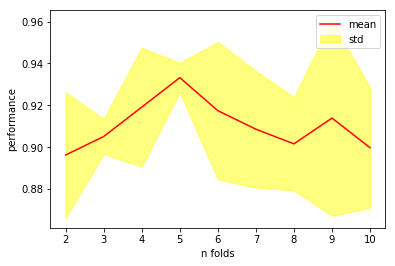

In [0]:
model21 = RandomForestClassifier(random_state=0)
print "DATOS TRANSFORMADOS CON PCA"
model21.fit(X_train2,y_train)
pred21=model21.predict(X_test2)
print("Matriz de confusión")
print confusion_matrix(y_test, pred21)
tn, fp, fn, tp = confusion_matrix(y_test, pred21).ravel()
print "tn: ",tn," fp: ", fp," fn: ", fn," tp: ", tp
RL=evaluar(model21,X_test2,y_test)
newcrossval(model21, X2, y)
crossr=cross_val_score(model21, X2, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "Cross validation score: %.4f" %np.mean(crossr)
evaluarcross(model21,X2,y)

<h2>KNN</h2>

***k-nearest neighbor*** es un algoritmo usado para clasificar nuevas muestras(valores discretos) o predecir (regresión y valores continuos), sirve esencialmente para clasificar valores buscando los puntos de datos más similares (por cercanía) aprendidos en la etapa de entrenamiento y haciendo conjeturas de nuevos puntos basados en esa clasificación.

*k* es la cantidad de puntos vecinos que tenemos en cuenta en la cercanía para clasificar los *n* grupos.

En resumen, es un algoritmo que busca en las observaciones mas cercanas a la que se está tratando de predecir y clasifica el punto de interés basado en la mayoria de datos que le rodean al ser un algoritmo supervisado, esto quiere decir, que tenemos etiquetado nuestro conjunto de datos de entrenamiento, con la clase o resultado esperado dada una fila de datos, también esta basado en instancia lo cual indica que este algoritmo no aprende explícitamente un modelo (como por ejemplo en regresión logística). En cambio memoriza las instancias de entrenamiento que son utilizadas como  base de conocimiento para la fase de predicción

Funcionamiento

*   Calcula la distancia entre el item a clasificar y el resto de items del dataset de entrenamiento.
*   Selecciona los "*k*" elementos mas cercanos (con menor distancia, según la fúncion que se utilice).
*   Realiza un "votación de mayoría" entre los *k* puntos: los de una clase /etiqueta que "dominen"  decidirán su clasificación final.

Las formas más populares de definir la cercanía entre puntos son la distancia euclidiana o la cosine similarity la cual mide el ángulo entre los vectores y cuanto menor sea este ángulo su similaridad será mayor.







Matriz de confusión
[[200  12]
 [  4 353]]
tn:  200  fp:  12  fn:  4  tp:  353
Precisión
F1 score = 0.9863
Accuracy Score= 0.9825
Cross validation score 1: 0.9543
Cross validation score 2:0.9596
2 3 4 5 6 7 8 9 10


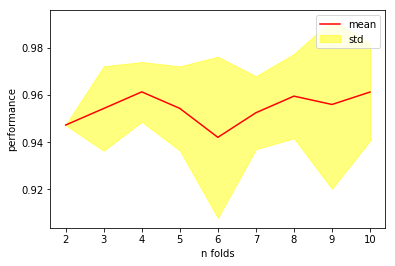

In [0]:
model3=KNeighborsClassifier(n_neighbors=5)
model3.fit(X,y)
pred3=model3.predict(X)
print("Matriz de confusión")
print confusion_matrix(y, pred3)
tn, fp, fn, tp = confusion_matrix(y, pred3).ravel()
print "tn: ",tn," fp: ", fp," fn: ", fn," tp: ", tp
f1k=evaluar(model3,X_test,y_test)[0] #f1_score
a1k=evaluar(model3,X_test,y_test)[1] #accuracy_score
crossk2=newcrossval(model3, X, y)
crossk1=cross_val_score(model3, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
crossk1=np.mean(crossk1)
print('Precisión')
print('F1 score = %.4f' % f1k)
print('Accuracy Score= %.4f' % a1k)
print "Cross validation score 1: %.4f" %crossk1
print "Cross validation score 2:%.4f"%crossk2
evaluarcross(model3,X,y)

                CROSS1 VS CROSS2   
         0.9543                0.9596


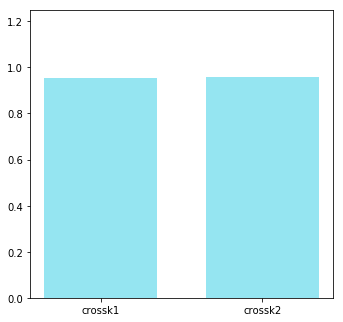

In [0]:
cross = [crossk1,crossk2] 
values = ('crossk1','crossk2') 
plt.axes((0.1, 0.1,0.7,1))  
plt.bar(np.arange(2), cross,color="#95E5F1",width=0.7)  
plt.ylim(0,1.25) 
plt.xticks(np.arange(2), values)  
print '                CROSS1 VS CROSS2   '
print '         %.4f'%crossk1,'               %.4f'%crossk2

Comparando las distintas variaciones de cross_val_score obteniendo como 
resultado que para  el modelo de **KNN** se obtuvo un mejor valor 
de veracidad en la implementación del cross_val_score con **LeaveOneOut()**

DATOS TRANSFORMADOS CON PCA
Matriz de confusión
[[199  13]
 [  5 352]]
tn:  199  fp:  13  fn:  5  tp:  352
Cross validation score: 0.9421
2 3 4 5 6 7 8 9 10


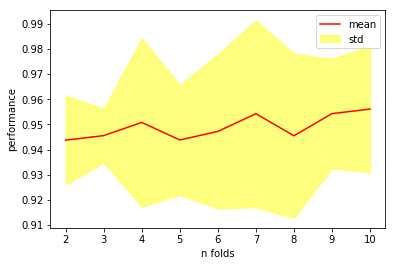

In [0]:
model31=KNeighborsClassifier(n_neighbors=5)
print "DATOS TRANSFORMADOS CON PCA"
model31.fit(X2,y)
pred31=model31.predict(X2)
print("Matriz de confusión")
print confusion_matrix(y, pred31)
tn, fp, fn, tp = confusion_matrix(y, pred31).ravel()
print "tn: ",tn," fp: ", fp," fn: ", fn," tp: ", tp
RL=evaluar(model31,X2,y)
newcrossval(model31, X2, y)
crossr=cross_val_score(model31, X2, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "Cross validation score: %.4f" %np.mean(crossr)
evaluarcross(model31,X2,y)

<h2>SVM</h2>

Matriz de confusión
[[40  1]
 [ 0 73]]
tn:  40  fp:  1  fn:  0  tp:  73
Precisión
F1 score = 0.9932
Accuracy Score= 0.9912
Cross validation score 1: 0.9701
Cross validation score 2:0.9754
2 3 4 5 6 7 8 9 10


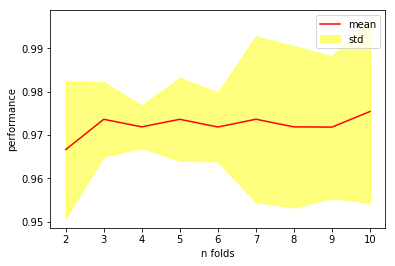

In [0]:
model4=SVC(random_state=0)
model4.fit(X_train,y_train)
pred4=model4.predict(X_test)
print("Matriz de confusión")
print confusion_matrix(y_test, pred4)
tn, fp, fn, tp = confusion_matrix(y_test, pred4).ravel()
print "tn: ",tn," fp: ", fp," fn: ", fn," tp: ", tp
f1v=evaluar(model4,X_test,y_test)[0] #f1_score
a1v=evaluar(model4,X_test,y_test)[1] #accuracy_score
crossv2=newcrossval(model4, X, y)
crossv1=cross_val_score(model4, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
crossv1=np.mean(crossv1)
print('Precisión')
print('F1 score = %.4f' % f1v)
print('Accuracy Score= %.4f' % a1v)
print "Cross validation score 1: %.4f" %crossv1
print "Cross validation score 2:%.4f"%crossv2
evaluarcross(model4,X,y)

                CROSS1 VS CROSS2   
         0.9701                0.9754


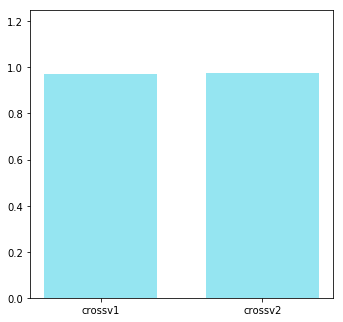

In [0]:
cross = [crossv1,crossv2] 
values = ('crossv1','crossv2') 
plt.axes((0.1, 0.1,0.7,1))  
plt.bar(np.arange(2), cross,color="#95E5F1",width=0.7)  
plt.ylim(0,1.25) 
plt.xticks(np.arange(2), values)  
print '                CROSS1 VS CROSS2   '
print '         %.4f'%crossv1,'               %.4f'%crossv2

Comparando las distintas variaciones de cross_val_score obteniendo como 
resultado que para  el modelo de **SVM** se obtuvo un mejor valor 
de veracidad en la implementación del cross_val_score con **LeaveOneOut()**

DATOS TRANSFORMADOS CON PCA
Matriz de confusión
[[38  3]
 [ 2 71]]
tn:  38  fp:  3  fn:  2  tp:  71
Cross validation score: 0.9526
2 3 4 5 6 7 8 9 10


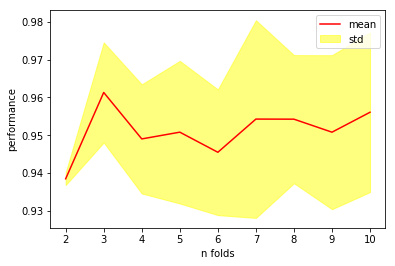

In [0]:
model41=SVC(random_state=0)
print "DATOS TRANSFORMADOS CON PCA"
model41.fit(X_train2,y_train)
pred41=model41.predict(X_test2)
print("Matriz de confusión")
print confusion_matrix(y_test, pred41)
tn, fp, fn, tp = confusion_matrix(y_test, pred41).ravel()
print "tn: ",tn," fp: ", fp," fn: ", fn," tp: ", tp
RL=evaluar(model41,X_test2,y_test)
newcrossval(model41, X2, y)
crossr=cross_val_score(model41, X2, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "Cross validation score: %.4f" %np.mean(crossr)
evaluarcross(model41,X2,y)

<h2>Deep learning</h2>
El Deep Learning lleva a cabo el proceso de Machine Learning usando una red neuronal artificial que se compone de un número de niveles jerárquicos. En el nivel inicial de la jerarquía  la red aprende algo simple y luego **env**ía esta información al siguiente nivel. El siguiente nivel toma esta información sencilla, la combina, compone una información algo un poco más compleja, y se lo pasa al tercer nivel, y así sucesivamente.



<img src="deep.jpg" style="width:700px;">

In [0]:
from tensorflow import keras
import tensorflow as tf


In [0]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(X_train.values[0].shape)),
    keras.layers.Dense(455, activation=tf.nn.relu),
   
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [0]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_24 (Flatten)         (None, 20)                0         
_________________________________________________________________
dense_142 (Dense)            (None, 455)               9555      
_________________________________________________________________
dense_143 (Dense)            (None, 2)                 912       
Total params: 10,467
Trainable params: 10,467
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [0]:
model.fit(X_train.as_matrix(), y_train, epochs=8);


Epoch 1/8
455/455 [==============================] - 0s - loss: 0.4343 - acc: 0.8330      
Epoch 2/8
455/455 [==============================] - 0s - loss: 0.1923 - acc: 0.9451     
Epoch 3/8
455/455 [==============================] - 0s - loss: 0.1335 - acc: 0.9626     
Epoch 4/8
455/455 [==============================] - 0s - loss: 0.1056 - acc: 0.9714     
Epoch 5/8
455/455 [==============================] - 0s - loss: 0.0893 - acc: 0.9758     
Epoch 6/8
455/455 [==============================] - 0s - loss: 0.0783 - acc: 0.9846     
Epoch 7/8
455/455 [==============================] - 0s - loss: 0.0698 - acc: 0.9868     
Epoch 8/8
455/455 [==============================] - 0s - loss: 0.0627 - acc: 0.9868     


In [0]:
test_loss, test_acc = model.evaluate(X_test.as_matrix(), y_test)

print('Test accuracy:', test_acc)

 32/114 [=======>......................] - ETA: 0s('Test accuracy:', 0.98245614035087714)


In [0]:
predictions = model.predict(X_test.as_matrix())
print("valor predicho:",  np.argmax(predictions[0]), "max prob: ", np.max(predictions[0]),
      "ground truth: ", y_test[0] )

('valor predicho:', 1, 'max prob: ', 0.99987078, 'ground truth: ', 1)


<h1>ESTADISTICAS EN COLOMBIA</h1>

In [0]:

uploaded2 = files.upload()
dcol = pd.read_csv(io.StringIO(uploaded2['dataset.CSV'].decode('utf-8'))) #lectura dataset colaboratory
#dcol = pd.read_csv("dataset.CSV")  #lectura dataset virtual box

In [0]:
dcol

v=np.sum(dcol.comportamiento==3)
del[]

print v, dcol.comportamiento.unique()
dcol.isnull().sum()#miramos si hay valores nulos


4238 [3 2 1 9]


identificador               0
secuencia tumor             0
fecha nacimiento            0
sexo                        0
fecha incidencia            0
edad                        0
sitio                       0
histologia                  0
comportamiento              0
cie 10                      0
estadio clinico T        3812
estadio clinico N        3858
estadio clinico M        3901
estadio patologico T     4083
estadio patologico N     4129
estadio patologico M     4172
base diagnostico            0
estado vital                0
fecha muerte                0
causa muerte             3772
fecha ultimo contacto       0
flag IARC                   0
regimen afiliacion          0
zona residencial            0
anio                        0
dtype: int64

In [0]:
dcol=dcol.drop(["identificador","estadio clinico T","estadio clinico N", "estadio clinico M", "estadio patologico T", "estadio patologico N","estadio patologico M","causa muerte"],1)


In [0]:
del dcol['cie 10']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f37fa2910>]],
      dtype=object)

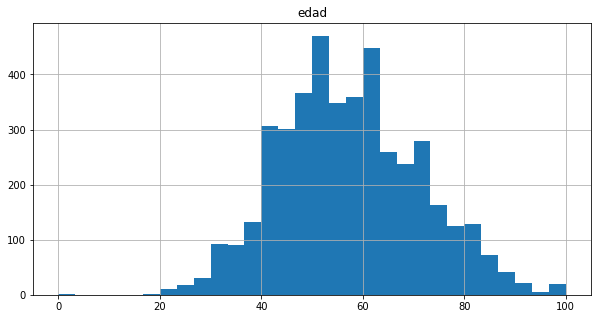

In [0]:
dcol.hist(["edad"],bins=30, figsize=(10,5))

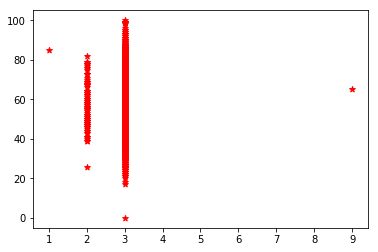

In [0]:
plt.scatter(dcol['comportamiento'],dcol['edad'],marker='*', color='red')

Variable numérica de un dígito:</br>
• 0 = Benigno</br>
• 1 = Incierto si es benigno o maligno</br>
• 2 = Carcinoma in situ</br>
• 3 = Maligno, localización primaria</br>
• 6 = Maligno, localización metastásica </br>
• 9 = Maligno, sin saber si la localización es primaria o metastásica</br>

<h1>ANÁLISIS ESTADISTICO DE RESULTADOS</h1> 

El análisis estadistico de resultados del proyecto se planteó analizando la comparacion del comportamiento de cada modelo  y los evaluadores de veracidad implementados,de esta manera podemos apreciar claramente que modelo implementado nos da mejores resultados en el detector de cancer de seno. 

               Cross_val_score 1
          
      0.9754    0.9508    0.9543   0.9701


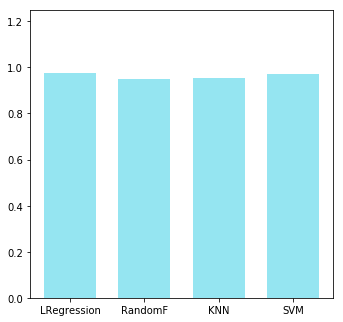

In [0]:
cross = [crossr1,crossf1,crossk1,crossv1] 
values = ('LRegression','RandomF','KNN','SVM') 
plt.axes((0.1, 0.1,0.7,1))  
plt.bar(np.arange(4), cross,color="#95E5F1",width=0.7)  
plt.ylim(0,1.25) 
plt.xticks(np.arange(4), values)  
print '              ','Cross_val_score 1'
print'          '

print '      %.4f'%crossr1,'   %.4f'%crossf1,'   %.4f'%crossk1,'  %.4f'%crossv1

               Cross_val_score 2
          
      0.9754    0.9508    0.9596   0.9754


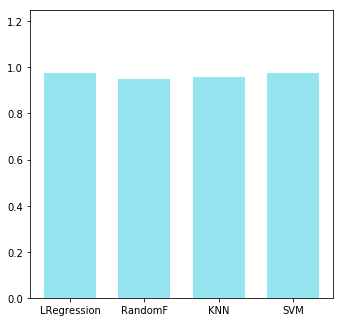

In [0]:
cross = [crossr2,crossf2,crossk2,crossv2] 
values = ('LRegression','RandomF','KNN','SVM') 
plt.axes((0.1, 0.1,0.7,1))  
plt.bar(np.arange(4), cross,color="#95E5F1",width=0.7)  
plt.ylim(0,1.25) 
plt.xticks(np.arange(4), values)  
print '              ','Cross_val_score 2'
print'          '

print '      %.4f'%crossr2,'   %.4f'%crossf2,'   %.4f'%crossk2,'  %.4f'%crossv2

               Accuracy_score
          
      0.9912    0.9737    0.9825   0.9912


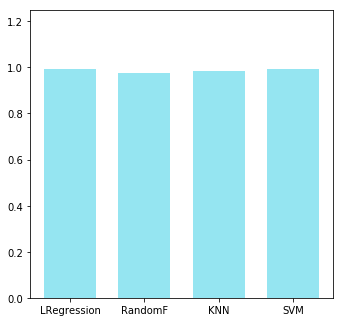

In [0]:
cross = [a1r,a1f,a1k,a1v] 
values = ('LRegression','RandomF','KNN','SVM') 
plt.axes((0.1, 0.1,0.7,1))  
plt.bar(np.arange(4), cross,color="#95E5F1",width=0.7)  
plt.ylim(0,1.25) 
plt.xticks(np.arange(4), values)  
print '              ','Accuracy_score'
print'          '

print '      %.4f'%a1r,'   %.4f'%a1f,'   %.4f'%a1k,'  %.4f'%a1v

                   F1_score
          
      0.9932    0.9796    0.9863   0.9932


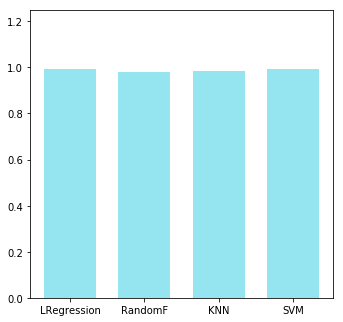

In [0]:
cross = [f1r,f1f,f1k,f1v] 
values = ('LRegression','RandomF','KNN','SVM') 
plt.axes((0.1, 0.1,0.7,1))  
plt.bar(np.arange(4), cross,color="#95E5F1",width=0.7)  
plt.ylim(0,1.25) 
plt.xticks(np.arange(4), values)  
print '                  ','F1_score'
print'          '

print '      %.4f'%f1r,'   %.4f'%f1f,'   %.4f'%f1k,'  %.4f'%f1v

Para llevar a cabo la evaluación de los modelos implementamos cuatro métricas:


*   F1_score
*   Accuracy_score
*   Cross_val_score  con KFold método 1
*   Cross_val_score con LeaveOneOut( ) método 2

De las cuatro métricas mencionadas anteriormente usaremos los resultado obtenidos en la grafica de** F1_score** ya que esta métrica es mas veraz al momento de  dar un resultado en este caso,debido a  que los errores cometidos por el modelo generan un mayor cambio en la veracidad del evaluador.

Esta métrica reduce la posibilidad de que surjan pacientes diagnosticados como falsos positivos(no esta enfermo pero lo diagnostican con cáncer) y falso negativo(esta enfermo y no le diagnostican la enfermedad).

En conclusión  los modelos que nos dan un mejor resultado son **LogisticRegression** y **SVM.**





<h2>Referencias</h2



 

1.   Yepez MC, Uribe C, Arias N, Navarro E, de Vries E, Gamboa O, Gil OF, Pardo C. Sistema de información de cáncer en Colombia -SICC (Versión 1.0). [Internet]. Bogotá, Colombia: Instituto Nacional de Cancerología -INC 2017. Disponible de: http://www.infocancer.co, fecha de acceso: [10/08/2019]</br>
2.   Instituto Nacional de Cancerología -INC, Departamento Administrativo Nacional de Estadística -DANE. Datos mortalidad nacional. Sistema de información de cáncer en Colombia -SICC (Versión 1.0). [Internet]. Bogotá, Colombia: INC, DANE 2017. Disponible de: http://www.infocancer.co, fecha de acceso: [10/08/2019]
3.Na8. (10 julio,2018). Clasificar con K-Nearest-Neighbor ejemplo en Python
. Lugar de publicación: Aprendiendo machine learning. https://www.aprendemachinelearning.com/clasificar-con-k-nearest-neighbor-ejemplo-en-python/.
4.Carlos Zelada. (10 mayo,2017). Evaluación de modelos de clasificación
. Lugar de publicación: RPubs. https://rpubs.com/chzelada/275494.


